In [1]:
import json
import time
import pandas as pd

The cell below will access the MRC and gather the information from the Melbourne research cloud for the desired query, which would be using the datasets of ASX in quarterly clusters and unemployment data that is already clustered quaterly

In [ ]:
URL = '' #Add URL here
res = requests.get(URL)
rjson = res.json()

In [ ]:
asx_quaterly = []

for hit in rjson['result']['aggregations']:
    quater = hit["_source"]["Quaterly"]
    price = float(hit["_source"]["Price"].replace(",", " "))
    change = float(hit["_source"]["Change %"][:-1])
    asx_quaterly.append((quater, price, change))

asx_quaterly.sort()
df_asx_quaterly = pd.DataFrame(asx_quaterly, columns=("Quater", "ASX Price", "ASX Change (%)"))

df_asx_quaterly.head(10)

The cells below will do the same as above, but do an elastic search on the unemployment dataset instead

In [ ]:
URL = ''
res = requests.get(URL)
rjson = res.json()

In [1]:
unemployment = []
for hit in rjson['result']['aggregations']:
    quater = hit['_source']['Quater']
    state = hit['_source']['State']
    unemployment_data = float(hit['_source']['Unemployment']) #Change for specific
    unemployment.append((quater, state, unemployment_data))
    
df_unemployment = pd.Dataframe(unemployment, columns = "Quater", "State", "Unemployment")
df_unemployment = df_unemployment.sort_values(by=['Quater', 'State'])

df_unemployment['Change'] = df_unemployment.groupby('State')['UnemploymentRate'].diff()
# This creates a way to map whether change mimics the same as ASX

df_unemployment.head(10)

SyntaxError: positional argument follows keyword argument (3633228185.py, line 9)

Analysis

In [2]:
df = pd.merge(df_unemployment, df_asx_quaterly, on='Quater')
df = df.dropna()

NameError: name 'df_unemployment' is not defined

In [5]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

NameError: name 'df' is not defined

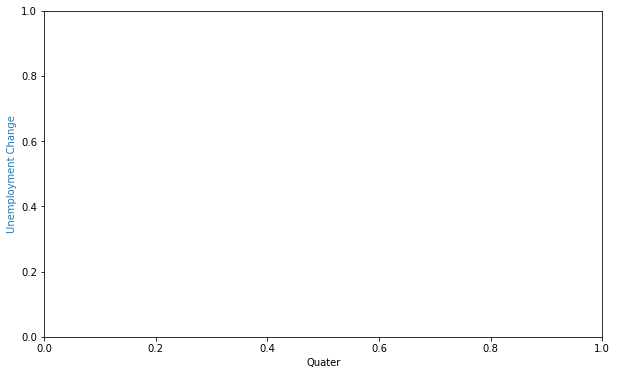

In [7]:
fig, ax1 = plt.subplots(figsize=(10,6))

colour = 'tab:blue'
ax1.set_xlabel('Quater')
ax1.set_ylabel('Unemployment Change', color=colour)
ax1.plot(df['Quater'], df['Change'], color=colour, marker='o', label='Unemployment Change')
ax1.tick_params(axis='y', labelcolor=colour)

ax2 = ax1.twinx()
colour2 = 'tab:red'
ax2.set_ylabel('ASX Change(%)', color=colour2)
ax2.plot(df['Quarter'], df['ASX Change (%)'], color=colour2, marker='x', label='ASX Change (%)')
ax2.tick_params(axis='y', labelcolor=colour2)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('Comparison of Unemployment Change and ASX Change Per Quarter')

plot.show()